# Loading of files

In [0]:
import missingno as msno

In [0]:
from google.colab import files
uploaded = files.upload()

# Once prompted, choose task_data.csv from your own local folder in your laptop/computer

Saving task_data.csv to task_data (2).csv


In [0]:
import pandas as pd
import numpy as np
import io

In [0]:
# change this if the name of the file according to the name shown in the output above
# for example if it says -- Saving task_data.csv to task_data (2).csv, put the file name as "task_data (2).csv"
file_name = 'task_data.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Exploratory Data Analysis 
For data cleaning and feature engineering

IMPORTANT: The data cleaning I am doing is meant for tree based models, not linear models. Hence, I did not use log to account for outliers and other methods one would use for linear models. Trees are invariant to change in scale of data.

In [0]:
df.head(4)

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail
0,helthematic,True,Jalan Sawahan No. 60 Padang (Dekat Pertamina S...,16.0,NaN,NaN,NaN,NaN,NaN,17.0,265.0,3.0,False,NaN,NaN,0.0,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/a7...,"[('text', 0.92769134, 0.92769134), ('product',...",False
1,shipliam,True,We bring purpose to design. \r\r\nIf you have ...,0.0,0.000000e+00,0.00000,0.00000,NaN,NaN,4.0,19.0,1.0,True,NaN,Social Media Agency,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ca...,"[('text', 0.95160943, 0.95160943), ('font', 0....",True
2,thesisurinary,True,"Cara, Sebab, dan Semestinya.\r\r\nNarahubung :...",22.0,1.130935e+14,-7.37467,110.16553,56262,6.285629e+11,381.0,407.0,7.0,True,https://drive.google.com/file/d/1mtEZb8famkPEf...,Local Service,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ae...,"[('text', 0.9648511, 0.9648511), ('white', 0.9...",True
3,ashesphentermine,True,❥รับสมัครตัวแทนจำหน่าย\r\r\n❥มี3ธนาคาร+ աaʟʟɛt...,4216.0,1.077829e+14,15.22810,104.85900,NaN,6.696472e+10,5369.0,29575.0,349.0,True,http://bit.ly/2Dozc4Z,Product/Service,0.0,0.0,2.0,https://scontent-arn2-1.cdninstagram.com/vp/91...,"[('face', 0.9701391, 0.9701391), ('skin', 0.95...",True


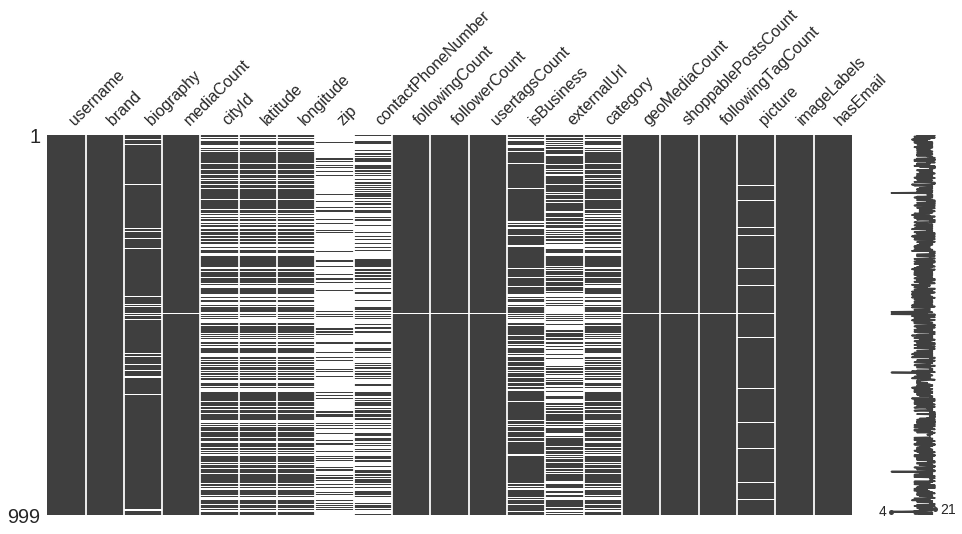

In [0]:
msno.matrix(df, figsize=(16,7))
# This is a visualisation tool that helps to identify missing data. 
# The white spaces you see are the missing data and it is useful in gaining preliminary intuition about the data.

Very distinct patterns in the data. Here are some thoughts thus far:
1. If there is no city ID, there will be no latitude and longitude either (Except for some instances where there is city ID and longitude but no latitude)
1. isBusiness and category seem to have some relationships
1. Why would isBusiness have missing values? Shouldn't it be True or False
1. Latitude and longitude may be linked to city ID. Zip might be the location of the store itself. A useful variable to create could be hasZIP and hasCityID, while dropping cityID, Longitude, Latitude and zip.
1. Length of biography could be useful, rather than the bio itself. Based on experience, brands tend to use fewer words while influencers flood their bio with as much information as they can about themselves.
1. There is one particular account that has numerous missing values (Look at the only missing row in mediaCount)

Thinking about the business:  
Upon analysis of my own instagram account, I'm prompted to include category (12 in total) when I attempt to switch to a business account. Intuition: Businesses may indicate category, but not all may place a category down. Company/Organization and Local Business option may be indicative of a brand.

 I am only able to find zip in a  business account on instagram. Likely to be the location of the store.

In [0]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
mediaCount,993.0,1.093151e+03,1.973489e+03,0.000000e+00,1.200000e+02,4.430000e+02,1.211000e+03,2.774200e+04
cityId,641.0,5.403509e+13,5.942651e+13,0.000000e+00,0.000000e+00,0.000000e+00,1.060312e+14,3.537165e+14
latitude,637.0,1.418293e+00,1.236527e+01,-3.781786e+01,-6.155250e+00,0.000000e+00,0.000000e+00,6.016561e+01
longitude,642.0,4.281038e+01,5.935010e+01,-1.231437e+02,0.000000e+00,0.000000e+00,1.068209e+02,1.512153e+02
contactPhoneNumber,414.0,3.787314e+12,5.103903e+12,6.215009e+08,6.693737e+10,6.281216e+12,6.282228e+12,6.289564e+13
followingCount,993.0,1.170493e+03,8.808673e+03,0.000000e+00,7.600000e+01,3.830000e+02,9.580000e+02,2.748120e+05
followerCount,993.0,3.336256e+05,5.762512e+06,0.000000e+00,1.226000e+03,1.094700e+04,3.524300e+04,1.396263e+08
usertagsCount,993.0,1.571483e+04,3.294658e+05,0.000000e+00,3.900000e+01,2.290000e+02,1.125000e+03,1.006420e+07
geoMediaCount,993.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
shoppablePostsCount,993.0,1.621349e+00,1.546548e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.280000e+02


In [0]:
df.columns

Index(['username', 'brand', 'biography', 'mediaCount', 'cityId', 'latitude',
       'longitude', 'zip', 'contactPhoneNumber', 'followingCount',
       'followerCount', 'usertagsCount', 'isBusiness', 'externalUrl',
       'category', 'geoMediaCount', 'shoppablePostsCount', 'followingTagCount',
       'picture', 'imageLabels', 'hasEmail'],
      dtype='object')

In [0]:
# This function returns a dictionary of column names and the number of distinct counts of values
def dictinct_column_counts(df):
    dic = {}
    for col in df.columns:
      print(col, df[col].nunique())

dictinct_column_counts(df)

username 999
brand 2
biography 946
mediaCount 720
cityId 128
latitude 248
longitude 254
zip 190
contactPhoneNumber 414
followingCount 670
followerCount 960
usertagsCount 619
isBusiness 2
externalUrl 581
category 157
geoMediaCount 1
shoppablePostsCount 24
followingTagCount 32
picture 966
imageLabels 954
hasEmail 2


Great! Username is unique as expected, and it seems like cityId latitude and longitude is not as closely correlated as we thought. Here is the feature engineering that we'll plan to do:
1. bioLength - for length of biography
1. hasLocation - to account for cityID, latitude and longitude
1. hasZIP - to account for the zip code
1. hasPhone - for contactPhoneNumber
1. hasURL - for externalUrl
1. hasPicture - if there is picture

Since geoMediaCount has only one value, we might just drop it, but we should analyse it first, as well as find out possible reasons behind missing and unclean data before we proceed with feature engineering. For a cleaner, structured approach, we will analyse the variables according to whether they are a categorical or continuous variable, or will be converted to one later on (Hence why phonenumber is in categorical and biography is in continuous)

Ignore Variable/Identity Variable:
'username'

Target Variable:
'brand'

Continuous:
 'biography', 'mediaCount', 'followingCount', 'followerCount', 'usertagsCount', 'geoMediaCount', 'shoppablePostsCount', 'followingTagCount'
 
Categorical:
'imageLabels', 'cityId', 'latitude', 'longitude', 'zip', 'contactPhoneNumber', 'isBusiness', 'externalUrl', 'category', 'hasEmail',  'picture'


## Defining code that will help us plot and do analysis later on

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


# This function plots out categorical variables, and can handle multiple categorical variables at once
# Input: dataframe, columns of the categorical variables to plot, as well as how big we want out cart to be as width and height
# note that cols has to be in a list
# Output: Bar chart
def plot_cat_variables(df, cols, width, height):
    for i in range(len(cols)):
        fig = plt.figure(figsize=[width, height])
        ax = fig.add_subplot(len(cols), 1, i+1)
        current_data = df.groupby(cols[i]).agg('count')
        current_data = current_data[current_data.columns[0]]
        x_var = list(current_data.index)

        for position in range(len(current_data)):
            plt.bar(position, current_data[position], align='center', alpha=0.5, label=x_var[position])
        plt.xticks(list(range(0,len(x_var))), x_var)
        plt.xlabel(cols[i])
        plt.ylim(0, (max(current_data)+1000))
        plt.ylabel("Count")
        plt.title(cols[i] + " Count")
        plt.legend()
        for j in range(len(current_data)):
            plt.text(x=j-0.1 , y=current_data[j]+200, s=current_data[j], size = 10)
            
# This plots categorical variables, split by the target
def plot_cat_tar_relation(df, col, target, width, height):
    g = sns.countplot(x=col, hue=target, palette ={True:"C0",False:"C1"},
                  data=df)
    g.set_xlabel(col)
    g.set_title(col)

# This function plots a violin plot, split by the target
# Input: df, col as a string, target as a string
def plot_violin(df, col, target):
  df["Dummy"] = ""
  g = sns.violinplot(x="Dummy", y=col, hue=target, data=df, split=True, scale="area")
  g.set_xlabel("")
  g.set_title("Violinplot of " + col)
  df = df.drop(columns="Dummy")
  
# This function plots a histogram for continuous variables
# Input: df, col as a string
def plot_hist(df, col):
  fig = plt.figure(figsize=[10,10])
  ax = fig.add_subplot(1, 1, 1)
  n, bins, patches = ax.hist(df[col])
  ax.set_xlabel(col)
  ax.set_title("Histogram of " + col)
  ax.set_ylabel('Frequency')

## Username

In [0]:
print(df['username'].nunique())
print(sum(df['username'] == np.nan))

999
0


Username is confirmed to be unique.

## Brand
This is the target variable

In [0]:
df['brand'].unique()
# Okay, the target variable seems to be correct!

array([ True, False])

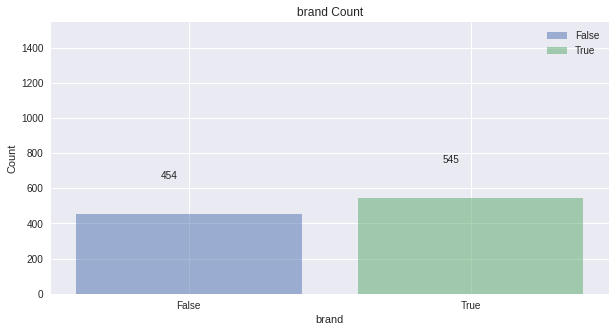

In [0]:
plot_cat_variables(df, ['brand'], 10, 5)
# We only have a slight class imbalance!

# Continuous Variables
## Biography

In [0]:
df["bioLength"] = df['biography'].str.len()
df['bioLength'] = df["bioLength"].fillna(0)

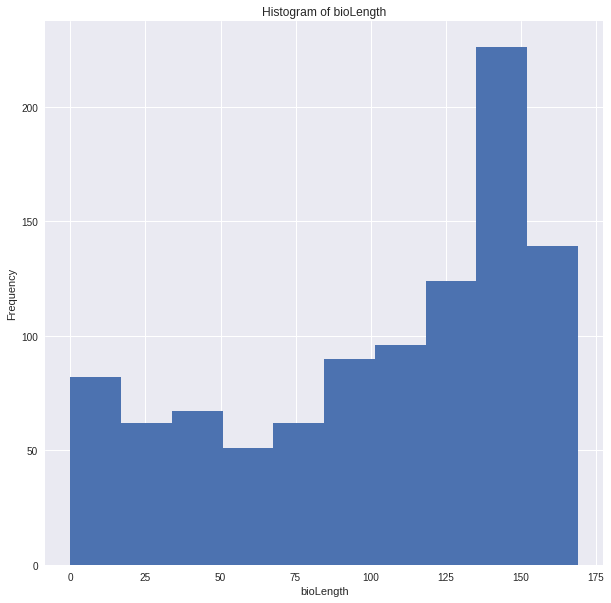

In [0]:
plot_hist(df, 'bioLength')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


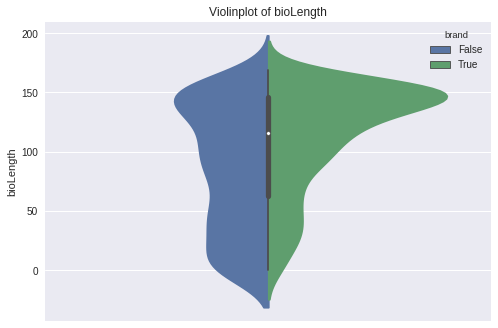

In [0]:
plot_violin(df, 'bioLength', 'brand')

## mediaCount

In [0]:
len(df[df['mediaCount'].isnull()])

6

In [0]:
df[df['mediaCount'].isnull()]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength
152,endifswinger,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0
464,staysgotta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0
470,omfac,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0
623,delayedtransport,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0
883,asincake,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0
988,crisppedigree,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(nan, nan, nan)]",False,,0.0


This is quite straightforward, anything with a lot of NaNs is unlikely to be a brand, as a brand would have put in effort into the product. We should attempt to find a threshold value. We could drop these rows, but note that in model building, we need to handle such data given to us so that we can label them properly. We should complete our analysis before deciding to drop such data or setting thresholds.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


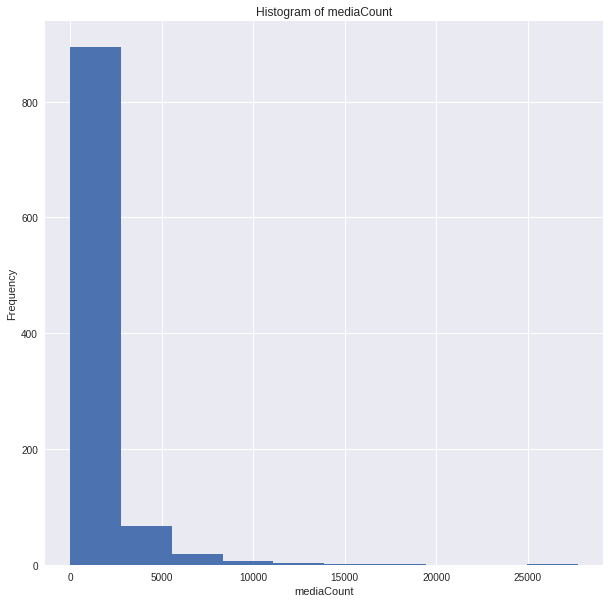

In [0]:
plot_hist(df, 'mediaCount')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


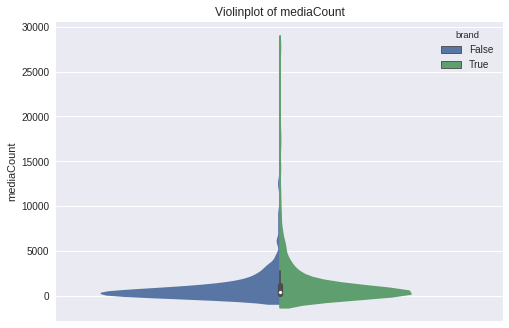

In [0]:
plot_violin(df, 'mediaCount', 'brand')

## followingCount

In [0]:
len(df[df['followingCount'].isnull()])

6

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


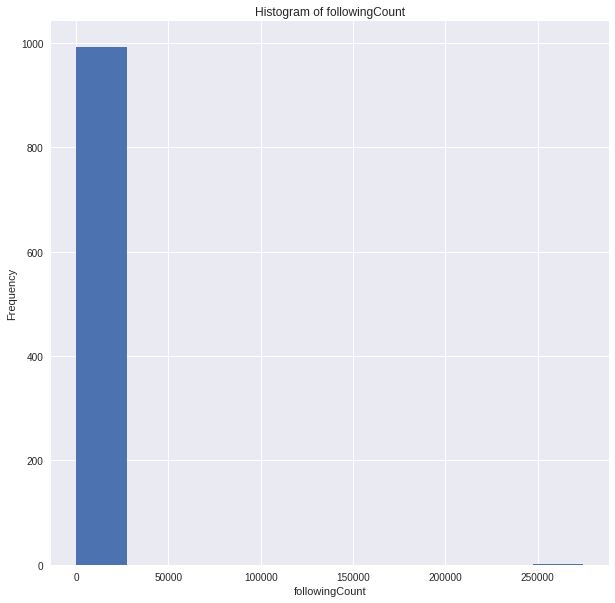

In [0]:
plot_hist(df, 'followingCount')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


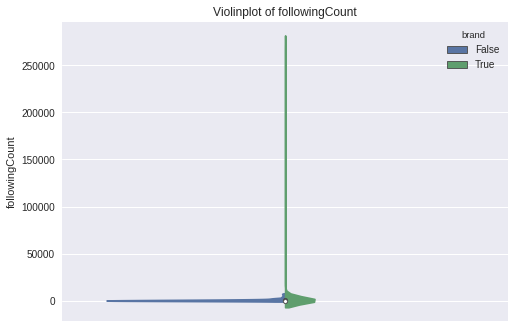

In [0]:
plot_violin(df, 'followingCount', 'brand')

In [0]:
df[df['followingCount'] > 200000]
# Rather strange. This particular user is a brand, ships products, but says they are not a business

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength
343,requestfac,True,WE SHIP EVERYWHERE \r\r\nEmail TheFabBoutique...,11485.0,NaN,NaN,NaN,NaN,NaN,274812.0,157799.0,254.0,False,http://www.TheFabBoutique.com/,NaN,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/e0...,"[('dress', 0.9607146999999999, 0.9607146999999...",False,,137.0


## followerCount

In [0]:
len(df[df['mediaCount'].isnull()])


6

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


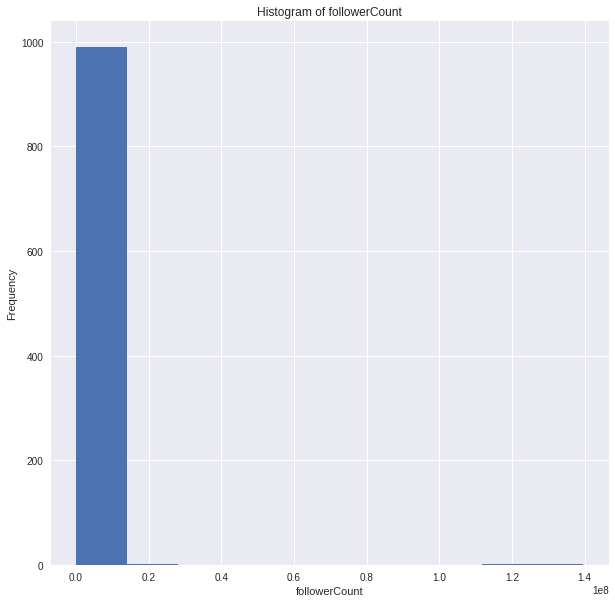

In [0]:
plot_hist(df, 'followerCount')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


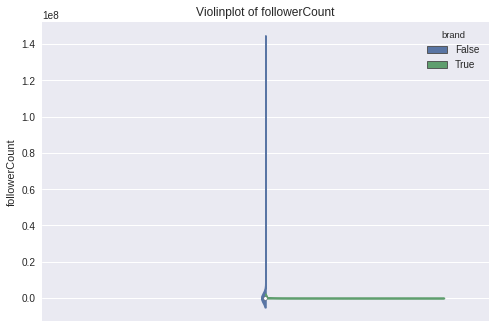

In [0]:
plot_violin(df, 'followerCount', 'brand')

In [0]:
len(df[(df["followerCount"] < 5000) & (df["brand"] == False)])
# Hence we have influencer, brands, and non influencers. We will just stick to predicting brand.

130

In [0]:
df[df['followerCount'] > 5000000]
# I don't recall any instagram accounts having 
# so many followers besides extremely well known celebrities. One account has nearly 140million.
# I'm guessing that workoutresponds is Selena Gomez, so username must have been anonymised to protect privacy.

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio
46,archiveddora,False,Muva 😎 Sebastian’s Mom 👶🏽 Ex-Stripper 💵 Activ...,353.0,NaN,NaN,NaN,NaN,NaN,198.0,17870970.0,138230.0,False,http://smarturl.it/amberrose,NaN,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/f1...,"[('boxing equipment', 0.83478874, 0.83478874),...",False,,92.0,9.025742e+04
494,toulousesurveying,False,@KKWBEAUTY @KKWFRAGRANCE,4442.0,NaN,NaN,NaN,NaN,NaN,113.0,114831561.0,2548560.0,NaN,NaN,NaN,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/dd...,"[('eyebrow', 0.9751389, 0.9751389), ('beauty',...",False,,24.0,1.016209e+06
808,workoutresponds,False,By grace through faith.,1450.0,NaN,NaN,NaN,NaN,NaN,36.0,139626274.0,10064197.0,False,http://smarturl.it/BackToYouSG,NaN,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/49...,"[('fashion model', 0.8323384, 0.8323384), ('si...",False,,23.0,3.878508e+06


### Just thought of another feature engineering to do! One metric instagrammers use: follower to following ratio.

In [0]:
df['followingCount'] = df['followingCount'].replace(0, 0.0000001)
df["followerRatio"] = df['followerCount'] / df['followingCount']
print(sum(df['followerRatio'].isnull()))

6


## usertagsCount

In [0]:
len(df[df['mediaCount'].isnull()])

6

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


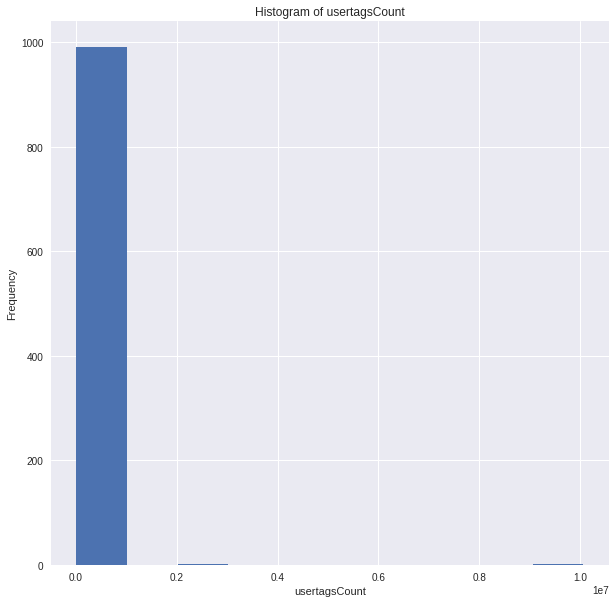

In [0]:
plot_hist(df, 'usertagsCount')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


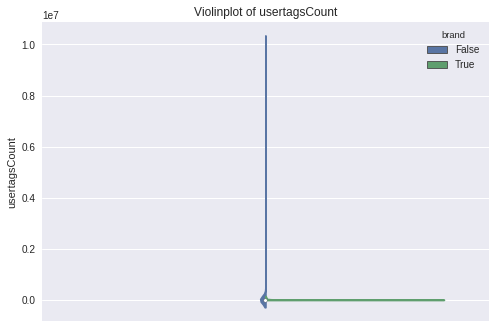

In [0]:
plot_violin(df, 'usertagsCount', 'brand')

In [0]:
df[df['usertagsCount'] > 5000000] #Selena Gomez again as the extreme outlier. Makes sense as she has the most active and famous account.

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio
808,workoutresponds,False,By grace through faith.,1450.0,NaN,NaN,NaN,NaN,NaN,36.0,139626274.0,10064197.0,False,http://smarturl.it/BackToYouSG,NaN,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/49...,"[('fashion model', 0.8323384, 0.8323384), ('si...",False,,23.0,3.878508e+06


## geoMediaCount

In [0]:
len(df[df['geoMediaCount'].isnull()])

6

In [0]:
df['geoMediaCount'].nunique()

1

This won't be useful at all. Therefore, we will drop the column.

In [0]:
df = df.drop(['geoMediaCount'], axis=1)

## shoppablePostsCount

In [0]:
len(df[df['shoppablePostsCount'].isnull()])

6

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


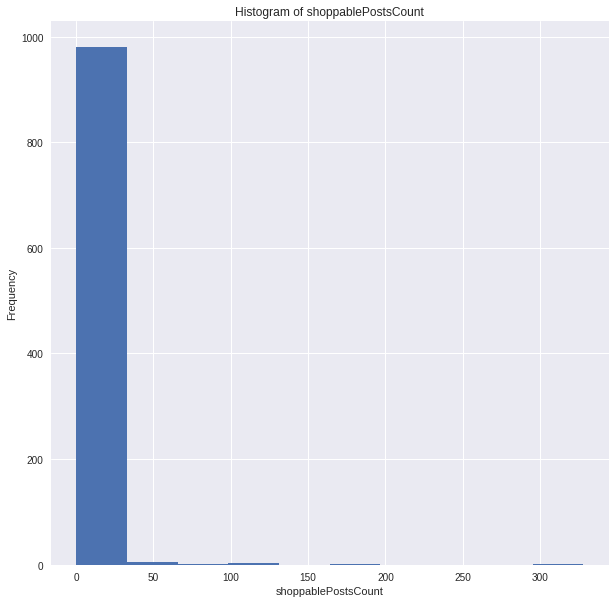

In [0]:
plot_hist(df, 'shoppablePostsCount')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


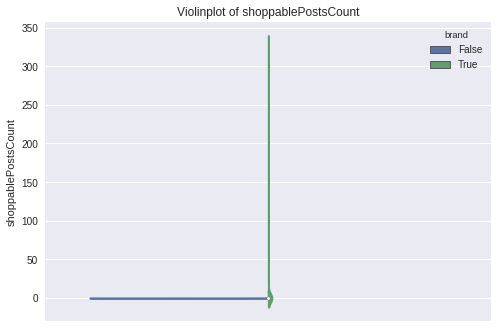

In [0]:
plot_violin(df, 'shoppablePostsCount', 'brand')

In [0]:
df[df['shoppablePostsCount'] > 100]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio
91,gothtcm,True,The official Instagram of Barneys New York\r\r...,7419.0,0.000000e+00,0.00000,0.00000,NaN,NaN,1115.0,1488502.0,88994.0,True,https://bit.ly/2NKF4KM,Retail Company,328.0,1.0,https://scontent-arn2-1.cdninstagram.com/vp/d0...,"[('text', 0.960951, 0.960951), ('black', 0.953...",True,,111.0,1334.979372
390,barelyfac,True,🎀The official Hunkemöller account\r\r\n✨Share ...,1956.0,0.000000e+00,0.00000,0.00000,NaN,NaN,1429.0,441721.0,33496.0,True,https://bit.ly/2LUHLJ9,Clothing (Brand),190.0,1.0,https://scontent-arn2-1.cdninstagram.com/vp/7e...,"[('pink', 0.9624861, 0.9624861), ('line', 0.67...",True,,150.0,309.111966
450,facbible,True,🐱 We sell cute stuff inspired by Japan & LA\r\...,6561.0,1.109708e+14,34.08329,-118.34956,90046,1.323935e+10,316.0,134669.0,5026.0,True,http://www.japanla.com/pages/buyitnow,Gift Shop,182.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/c6...,"[('stuffed toy', 0.9709869, 0.9709869), ('plus...",True,,65.0,426.167722
536,lacrosseplugin,True,For the girl most #LIKELYto have a closet full...,535.0,0.000000e+00,0.00000,0.00000,NaN,NaN,914.0,16626.0,3543.0,True,http://likely.nyc/insta,Clothing (Brand),111.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/a5...,"[('text', 0.9594265999999999, 0.95942659999999...",True,,133.0,18.190372
549,weightedfac,True,#다홍 #dahong,3944.0,1.082595e+14,37.56890,126.97700,06120,8.215777e+09,6.0,38154.0,784.0,True,http://dahong.dscount.com/,Clothing (Brand),108.0,1.0,https://scontent-amt2-1.cdninstagram.com/vp/12...,"[('text', 0.9655852, 0.9655852), ('font', 0.89...",True,,11.0,6359.000000
726,cenrupert,True,A premium Australian fashion brand setting the...,1885.0,0.000000e+00,0.00000,0.00000,NaN,6.118008e+11,400.0,21690.0,6875.0,True,https://www.politix.com.au/ss19-tech-lab-campa...,Clothing (Brand),106.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/7a...,"[('text', 0.9634106, 0.9634106), ('black', 0.9...",False,,127.0,54.225000


In [0]:
len(df[df['shoppablePostsCount'] == 0])

965

In [0]:
df[df['shoppablePostsCount'] > 0]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio
90,asneak,True,Premium Athletic Wear: engineered for performa...,1949.0,0.000000e+00,0.000000,0.000000,NaN,1.888595e+10,3.044000e+03,122896.0,5431.0,True,http://barbellapparel.com/,Clothing (Brand),12.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/25...,"[('text', 0.95673907, 0.95673907), ('black', 0...",True,,131.0,4.037319e+01
91,gothtcm,True,The official Instagram of Barneys New York\r\r...,7419.0,0.000000e+00,0.000000,0.000000,NaN,NaN,1.115000e+03,1488502.0,88994.0,True,https://bit.ly/2NKF4KM,Retail Company,328.0,1.0,https://scontent-arn2-1.cdninstagram.com/vp/d0...,"[('text', 0.960951, 0.960951), ('black', 0.953...",True,,111.0,1.334979e+03
111,breweryharley,True,London & Los Angeles Based✨\r\r\nCertified Cru...,1006.0,0.000000e+00,0.000000,0.000000,NaN,NaN,5.820000e+02,50109.0,21726.0,True,http://www.bellapierre.com/,Cosmetics Store,55.0,2.0,https://scontent-arn2-1.cdninstagram.com/vp/11...,"[('text', 0.9208732, 0.9208732), ('font', 0.86...",True,,153.0,8.609794e+01
145,malawiricardo,True,"47 Wooster Street, Soho NYC",2329.0,0.000000e+00,0.000000,0.000000,NaN,1.800966e+10,1.320000e+02,268478.0,15821.0,True,http://www.buscemi.com/,Shopping & Retail,51.0,2.0,https://scontent-arn2-1.cdninstagram.com/vp/5a...,"[('feather', 0.8256505, 0.8256505), ('wing', 0...",True,,27.0,2.033924e+03
155,analysistemper,True,Creating iconic timepieces that embody the lif...,502.0,0.000000e+00,0.000000,0.000000,NaN,NaN,8.870000e+02,4528.0,1196.0,True,http://catenelsonwatches.com/,Jewelry/Watches,26.0,1.0,https://scontent-iad3-1.cdninstagram.com/vp/a0...,"[('text', 0.86605656, 0.86605656), ('font', 0....",True,,143.0,5.104848e+00
263,helpim,True,"Designed in Auckland, New Zealand and handcraf...",1359.0,0.000000e+00,0.000000,0.000000,NaN,NaN,8.810000e+02,38857.0,957.0,True,https://www.ecoya.com.au/pages/stockists,Home Decor,7.0,1.0,https://scontent-amt2-1.cdninstagram.com/vp/db...,"[('text', 0.9677985999999998, 0.96779859999999...",True,,77.0,4.410556e+01
298,heldevastating,True,"Amsterdam based, founded in '09 by Guillaume P...",2044.0,0.000000e+00,0.000000,0.000000,NaN,NaN,1.000000e-07,471433.0,35932.0,True,https://goo.gl/36dCGJ,Clothing (Brand),39.0,0.0,https://scontent-atl3-1.cdninstagram.com/vp/21...,"[('text', 0.9487303, 0.9487303), ('font', 0.87...",True,,132.0,4.714330e+12
323,condominiumfac,True,Cutting-edge skincare innovation since 1932 ✨ ...,409.0,0.000000e+00,0.000000,0.000000,NaN,NaN,1.790000e+02,2791.0,1336.0,True,http://bit.ly/GatineauSkincare,Health/Beauty,12.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/84...,"[('text', 0.9565464, 0.9565464), ('font', 0.89...",True,,63.0,1.559218e+01
390,barelyfac,True,🎀The official Hunkemöller account\r\r\n✨Share ...,1956.0,0.000000e+00,0.000000,0.000000,NaN,NaN,1.429000e+03,441721.0,33496.0,True,https://bit.ly/2LUHLJ9,Clothing (Brand),190.0,1.0,https://scontent-arn2-1.cdninstagram.com/vp/7e...,"[('pink', 0.9624861, 0.9624861), ('line', 0.67...",True,,150.0,3.091120e+02
392,automatesolve,True,"""Great things never came from comfort zones."" ...",108.0,0.000000e+00,0.000000,0.000000,NaN,NaN,2.800000e+01,7097.0,1554.0,True,NaN,Business,2.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/9f...,"[('text', 0.96110404, 0.96110404), ('font', 0....",True,,84.0,2.534643e+02


According to the definition of brands provided, user terracemarin should be a brand as it is promoting their bikini product. 

https://www.facebook.com/illiasswimwear/

This would make sense, as anyone who has shoppable posts are promoting products to sell. Rather than using a number, we can just use a boolean hasShoppablePosts to replace shoppablePostsCount.

In [0]:
df["hasShoppablePosts"] = df['shoppablePostsCount'] > 0

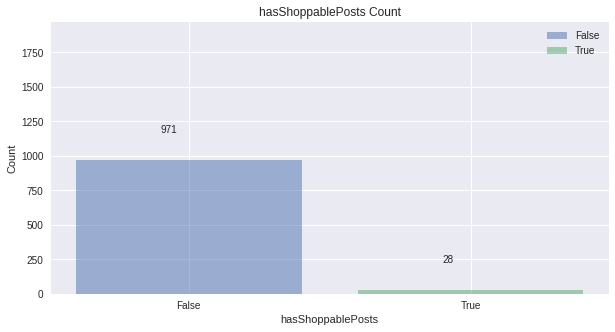

In [0]:
plot_cat_variables(df, ["hasShoppablePosts"], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


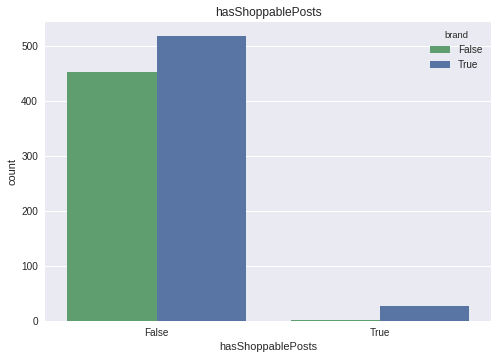

In [0]:
plot_cat_tar_relation(df, "hasShoppablePosts", "brand", 10, 5)

### Shoppable Posts have only recently been introduced, since March last year. Perhaps as more brands take up this feature of instagram it might become easier to predict who are brands.

## followingTagCount

In [0]:
len(df[df['followingTagCount'].isnull()])

6

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


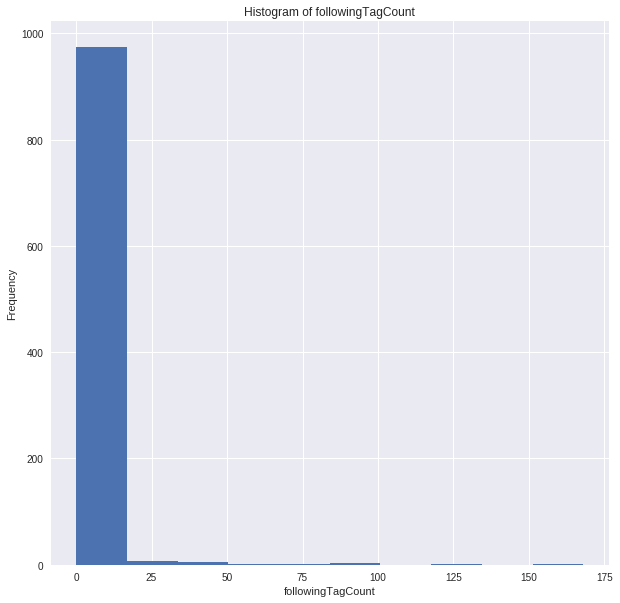

In [0]:
plot_hist(df, "followingTagCount")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


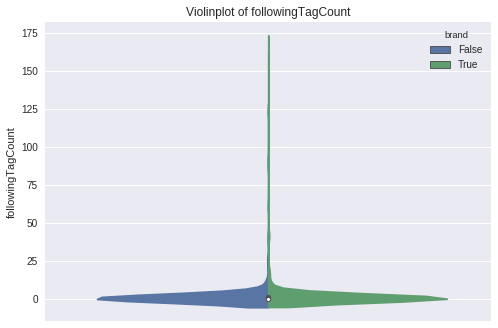

In [0]:
plot_violin(df, "followingTagCount", 'brand')

# Categorical Variables
Time to analyse and clean categorical variables and think of useful feature engineering as we gain more intuition about the data.

 'imageLabels', 'cityId', 'latitude', 'longitude', 'zip', 'contactPhoneNumber', 'isBusiness', 'externalUrl', 'category', 'hasEmail', 'picture'

## ImageLabels

In [0]:
df['imageLabels']

0      [('text', 0.92769134, 0.92769134), ('product',...
1      [('text', 0.95160943, 0.95160943), ('font', 0....
2      [('text', 0.9648511, 0.9648511), ('white', 0.9...
3      [('face', 0.9701391, 0.9701391), ('skin', 0.95...
4      [('text', 0.9353178, 0.9353178), ('font', 0.85...
5                                      [(nan, nan, nan)]
6      [('eyebrow', 0.9180752, 0.9180752), ('beauty',...
7      [('green', 0.960634, 0.960634), ('text', 0.938...
8      [('green', 0.9682008, 0.9682008), ('text', 0.9...
9      [('head', 0.86083776, 0.86083776), ('neck', 0....
10                                     [(nan, nan, nan)]
11     [('sunglasses', 0.8986325000000001, 0.89863250...
12                                     [(nan, nan, nan)]
13     [('headgear', 0.74545217, 0.74545217), ('touri...
14     [('face', 0.97671324, 0.97671324), ('hair', 0....
15     [('soldier', 0.90143985, 0.90143985), ('army',...
16     [('face', 0.9495738, 0.9495738), ('person', 0....
17     [('red', 0.9694782, 0.96

## CityID, Latitude, Longitude

In [0]:
print(len(df[df["cityId"].isnull()]))
print(len(df[df["latitude"].isnull()]))
print(len(df[df["longitude"].isnull()]))

358
362
357


Here, we're finding for inconsistencies in data. If there is cityId, we expect there to be latitude and longtidude and vice-versa. However, this isn't the case and we need to be careful about how we go about with our feature engineering.

In [0]:
df[-(((df["cityId"].isnull()) & (df["latitude"].isnull()) & (df["longitude"].isnull())) | ((-df["cityId"].isnull()) & (-df["latitude"].isnull()) & (-df["longitude"].isnull())))]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts
73,heladmiral,True,AVIATOR APPAREL AND STUFF\r\r\n 💥 READY STO...,548.0,1.079787e+14,NaN,106.631944,NaN,NaN,251.0,586.0,16.0,True,https://www.tokopedia.com/aviatorshopid,Aerospace Company,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/7c...,"[('text', 0.8716738000000002, 0.87167380000000...",False,,168.0,2.334661,False
252,bitmaptextiles,False,Make up by @dewips_pelangi\r\r\nHOME SERVICE \...,497.0,1.131318e+14,NaN,110.364444,55782,6.285810e+12,1404.0,4522.0,109.0,True,NaN,Health/Beauty,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/2a...,"[('eyebrow', 0.98091894, 0.98091894), ('face',...",False,,106.0,3.220798,False
312,alumnipedals,True,Music Production | Collaborative Orchestra\r\r...,118.0,1.079787e+14,NaN,106.631944,15810,6.281619e+11,423.0,755.0,40.0,True,https://youtu.be/Xv4ZMvQHW0U,Musician,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/18...,"[('text', 0.96311104, 0.96311104), ('font', 0....",True,,94.0,1.784870,False
445,viewerseighth,True,🎥 Sinopsis Film 🎥 Trailer Terbaru\r\r\n🙏Follow...,321.0,1.123002e+14,NaN,119.431111,90234,6.281342e+12,7.0,2113.0,6.0,True,http://www.jadwalbioskop.top/,Business,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/51...,"[('text', 0.8752146999999999, 0.87521469999999...",True,,146.0,301.857143,False
483,todaysfac,True,"""selamat beraktifitas sayang ku jangan lupa be...",2717.0,1.131318e+14,NaN,110.364444,NaN,6.287742e+12,1216.0,67517.0,16748.0,True,https://bit.ly/2FluvZU,Just For Fun,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/dd...,"[('girl', 0.61352444, 0.61352444), ('finger', ...",False,,150.0,55.523849,False
503,helpfac,True,"Call, sms text or WA : +6285811886717\r\r\n#co...",63.0,NaN,-6.235565,106.828559,12940,6.285812e+12,162.0,274.0,32.0,True,NaN,Business,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/61...,"[('text', 0.8850610999999999, 0.88506109999999...",True,,58.0,1.691358,False


In [0]:
# Realise that there are some repeat longitudes. Let's see some of them
df[df['longitude'] == df[df['username'] == 'bitmaptextiles'].iloc[0]['longitude']]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts
252,bitmaptextiles,False,Make up by @dewips_pelangi\r\r\nHOME SERVICE \...,497.0,1.131318e+14,NaN,110.364444,55782,6.285810e+12,1404.0,4522.0,109.0,True,NaN,Health/Beauty,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/2a...,"[('eyebrow', 0.98091894, 0.98091894), ('face',...",False,,106.0,3.220798,False
483,todaysfac,True,"""selamat beraktifitas sayang ku jangan lupa be...",2717.0,1.131318e+14,NaN,110.364444,NaN,6.287742e+12,1216.0,67517.0,16748.0,True,https://bit.ly/2FluvZU,Just For Fun,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/dd...,"[('girl', 0.61352444, 0.61352444), ('finger', ...",False,,150.0,55.523849,False


In [0]:
df[df['longitude'] == df[df['username'] == 'heladmiral'].iloc[0]['longitude']]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts
73,heladmiral,True,AVIATOR APPAREL AND STUFF\r\r\n 💥 READY STO...,548.0,1.079787e+14,NaN,106.631944,NaN,NaN,251.0,586.0,16.0,True,https://www.tokopedia.com/aviatorshopid,Aerospace Company,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/7c...,"[('text', 0.8716738000000002, 0.87167380000000...",False,,168.0,2.334661,False
312,alumnipedals,True,Music Production | Collaborative Orchestra\r\r...,118.0,1.079787e+14,NaN,106.631944,15810,6.281619e+11,423.0,755.0,40.0,True,https://youtu.be/Xv4ZMvQHW0U,Musician,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/18...,"[('text', 0.96311104, 0.96311104), ('font', 0....",True,,94.0,1.784870,False


We are unable to find intuition behind the missing values. We would have been able to determine of there were legitimate missing values and replace with sensible replacements if there were other values with same cityId and longitude.

However, since there are values provided, our feature engineering of hasLocation will be set to true as long as we have either cityId, latitude or longitude as there is some semblance of location.

In [0]:
df["hasLocation"] = ((-df["cityId"].isnull()) | (-df["latitude"].isnull()) | (-df['longitude'].isnull()))

In [0]:
# In order to see if it has worked as expected
df[-(((df["cityId"].isnull()) & (df["latitude"].isnull()) & (df["longitude"].isnull())) | ((-df["cityId"].isnull()) & (-df["latitude"].isnull()) & (-df["longitude"].isnull())))]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts,hasLocation
73,heladmiral,True,AVIATOR APPAREL AND STUFF\r\r\n 💥 READY STO...,548.0,1.079787e+14,NaN,106.631944,NaN,NaN,251.0,586.0,16.0,True,https://www.tokopedia.com/aviatorshopid,Aerospace Company,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/7c...,"[('text', 0.8716738000000002, 0.87167380000000...",False,,168.0,2.334661,False,True
252,bitmaptextiles,False,Make up by @dewips_pelangi\r\r\nHOME SERVICE \...,497.0,1.131318e+14,NaN,110.364444,55782,6.285810e+12,1404.0,4522.0,109.0,True,NaN,Health/Beauty,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/2a...,"[('eyebrow', 0.98091894, 0.98091894), ('face',...",False,,106.0,3.220798,False,True
312,alumnipedals,True,Music Production | Collaborative Orchestra\r\r...,118.0,1.079787e+14,NaN,106.631944,15810,6.281619e+11,423.0,755.0,40.0,True,https://youtu.be/Xv4ZMvQHW0U,Musician,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/18...,"[('text', 0.96311104, 0.96311104), ('font', 0....",True,,94.0,1.784870,False,True
445,viewerseighth,True,🎥 Sinopsis Film 🎥 Trailer Terbaru\r\r\n🙏Follow...,321.0,1.123002e+14,NaN,119.431111,90234,6.281342e+12,7.0,2113.0,6.0,True,http://www.jadwalbioskop.top/,Business,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/51...,"[('text', 0.8752146999999999, 0.87521469999999...",True,,146.0,301.857143,False,True
483,todaysfac,True,"""selamat beraktifitas sayang ku jangan lupa be...",2717.0,1.131318e+14,NaN,110.364444,NaN,6.287742e+12,1216.0,67517.0,16748.0,True,https://bit.ly/2FluvZU,Just For Fun,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/dd...,"[('girl', 0.61352444, 0.61352444), ('finger', ...",False,,150.0,55.523849,False,True
503,helpfac,True,"Call, sms text or WA : +6285811886717\r\r\n#co...",63.0,NaN,-6.235565,106.828559,12940,6.285812e+12,162.0,274.0,32.0,True,NaN,Business,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/61...,"[('text', 0.8850610999999999, 0.88506109999999...",True,,58.0,1.691358,False,True


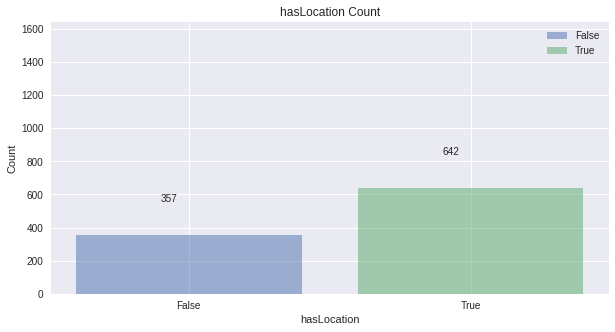

In [0]:
plot_cat_variables(df, ["hasLocation"], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


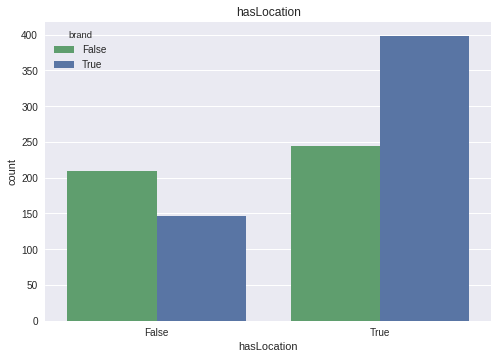

In [0]:
plot_cat_tar_relation(df, "hasLocation", "brand", 10, 5)

 ## zip

In [0]:
df["hasZIP"] = -df["zip"].isnull()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


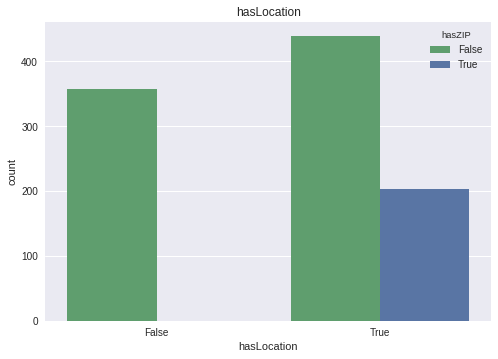

In [0]:
# Let's see if there is any relationship between hasLocation and hasZIP
plot_cat_tar_relation(df, "hasLocation", "hasZIP", 10, 5)

Yes there is a relationship! If hasLocation is False, there won't be any ZIP code

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


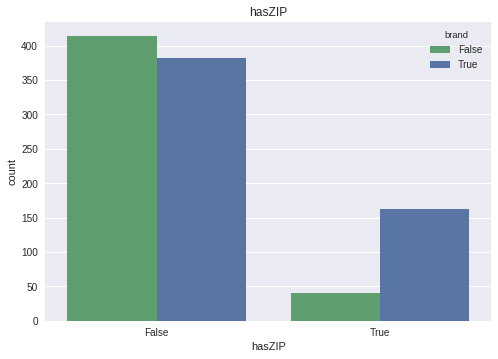

In [0]:
plot_cat_tar_relation(df, "hasZIP", "brand", 10, 5)

Okay cool! We know this can be quite a useful tool because of hasZIP is true, it's more likely to be a brand

## contactPhoneNumber

In [0]:
df["hasPhone"] = -df["contactPhoneNumber"].isnull()

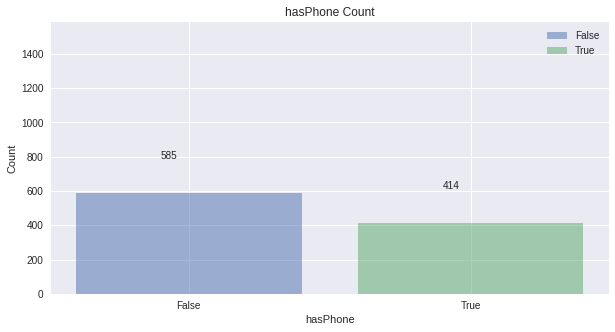

In [0]:
plot_cat_variables(df, ["hasPhone"], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


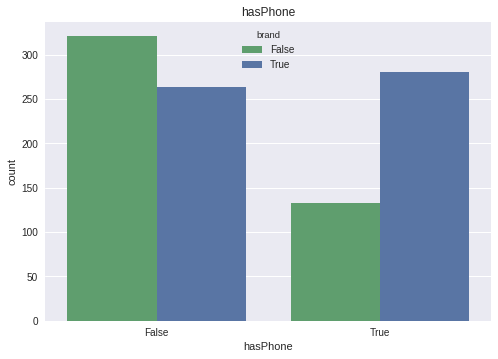

In [0]:
plot_cat_tar_relation(df, "hasPhone", "brand", 10, 5)

## isBusiness

In [0]:
sum(df["isBusiness"].isnull())

193

In [0]:
df[df["isBusiness"].isnull()].head(5)

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone
4,helwillow,True,Premium Ingredients & Good Taste\r\r\nThe Art ...,225.0,NaN,NaN,NaN,NaN,NaN,7.448000e+03,2274.0,26.0,NaN,NaN,NaN,0.0,3.0,https://scontent-arn2-1.cdninstagram.com/vp/3e...,"[('text', 0.9353178, 0.9353178), ('font', 0.85...",False,,113.0,3.053169e-01,False,False,False,False
5,areasensuring,False,Murah Banget!.,0.0,NaN,NaN,NaN,NaN,NaN,1.000000e-07,92.0,3.0,NaN,NaN,NaN,0.0,0.0,https://instagram.fros4-1.fna.fbcdn.net/vp/eaf...,"[(nan, nan, nan)]",False,,14.0,9.200000e+08,False,False,False,False
9,bishopsprisoners,False,hehe,1.0,NaN,NaN,NaN,NaN,NaN,1.000000e-07,859.0,5389.0,NaN,NaN,NaN,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ea...,"[('head', 0.86083776, 0.86083776), ('neck', 0....",False,,4.0,8.590000e+09,False,False,False,False
12,bearlinker,False,Mencintai: Bonita Aryani \r\r\nKamera/Foto \r\...,131.0,NaN,NaN,NaN,NaN,NaN,2.200000e+01,27874.0,24.0,NaN,NaN,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,148.0,1.267000e+03,False,False,False,False
13,romeoesta,False,● Jakarta-Indonesia\r\r\nCaption disesuaikan d...,709.0,NaN,NaN,NaN,NaN,NaN,4.350000e+02,3723.0,56.0,NaN,https://goo.gl/3CljGu,NaN,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/5f...,"[('headgear', 0.74545217, 0.74545217), ('touri...",False,,154.0,8.558621e+00,False,False,False,False


In [0]:
df[df["isBusiness"] == False].head(5)

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone
0,helthematic,True,Jalan Sawahan No. 60 Padang (Dekat Pertamina S...,16.0,NaN,NaN,NaN,NaN,NaN,17.0,265.0,3.0,False,NaN,NaN,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/a7...,"[('text', 0.92769134, 0.92769134), ('product',...",False,,72.0,15.588235,False,False,False,False
10,linguisticbontril,False,🏡Working in the real estate\r\r\n❤Traveling❤Ho...,439.0,NaN,NaN,NaN,NaN,NaN,241.0,20662.0,46.0,False,NaN,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,83.0,85.734440,False,False,False,False
25,enableddim,True,Open (08.00-16.00) \r\r\nFriday off\r\r\nORDER...,48.0,NaN,NaN,NaN,NaN,NaN,79.0,145.0,0.0,False,https://api.whatsapp.com/send?phone=6281937920...,NaN,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/42...,"[('fashion', 0.79219383, 0.79219383), ('bag', ...",False,,159.0,1.835443,False,False,False,False
34,boolbeetle,False,Jakarta - Indonesia\r\r\nActor\r\r\nThe creati...,1634.0,NaN,NaN,NaN,NaN,NaN,806.0,226775.0,5445.0,False,NaN,NaN,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/72...,"[('sky', 0.9464065, 0.9464065), ('air travel',...",False,,78.0,281.358561,False,False,False,False
36,helstanding,False,"🏡Based In Bandung, Indonesia \r\r\n🔑My Life = ...",2630.0,NaN,NaN,NaN,NaN,NaN,583.0,17296.0,61.0,False,NaN,NaN,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/fe...,"[('human hair color', 0.90671796, 0.90671796),...",False,,111.0,29.667238,False,False,False,False


In [0]:
df[df["isBusiness"] == True].head(5)

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone
1,shipliam,True,We bring purpose to design. \r\r\nIf you have ...,0.0,0.000000e+00,0.00000,0.00000,NaN,NaN,4.0,19.0,1.0,True,NaN,Social Media Agency,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ca...,"[('text', 0.95160943, 0.95160943), ('font', 0....",True,,137.0,4.750000,False,True,False,False
2,thesisurinary,True,"Cara, Sebab, dan Semestinya.\r\r\nNarahubung :...",22.0,1.130935e+14,-7.37467,110.16553,56262,6.285629e+11,381.0,407.0,7.0,True,https://drive.google.com/file/d/1mtEZb8famkPEf...,Local Service,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ae...,"[('text', 0.9648511, 0.9648511), ('white', 0.9...",True,,120.0,1.068241,False,True,True,True
3,ashesphentermine,True,❥รับสมัครตัวแทนจำหน่าย\r\r\n❥มี3ธนาคาร+ աaʟʟɛt...,4216.0,1.077829e+14,15.22810,104.85900,NaN,6.696472e+10,5369.0,29575.0,349.0,True,http://bit.ly/2Dozc4Z,Product/Service,0.0,2.0,https://scontent-arn2-1.cdninstagram.com/vp/91...,"[('face', 0.9701391, 0.9701391), ('skin', 0.95...",True,,129.0,5.508475,False,True,False,True
6,aestheticspromote,False,💼 Email me : hazellxsm@gmail.com,1899.0,0.000000e+00,0.00000,0.00000,NaN,NaN,841.0,29754.0,311.0,True,http://keepwear.co/,Business,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/a1...,"[('eyebrow', 0.9180752, 0.9180752), ('beauty',...",True,,32.0,35.379310,False,True,False,False
7,countinghel,True,1)Asia Square Tower 2 01-03\r\r\n2)The Sail @ ...,162.0,1.055658e+14,1.27836,103.85085,018961,6.590695e+09,5027.0,989.0,113.0,True,http://www.63ESPRESSO.com/,Coffee Shop,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/49...,"[('green', 0.960634, 0.960634), ('text', 0.938...",True,,94.0,0.196738,False,True,True,True


When isBusiness is shown as null, we get a lot of NaN values for location, zip, phone. Comparing with when isBusiness is shown as True or False, having null for isBusiness is likely to be "False".

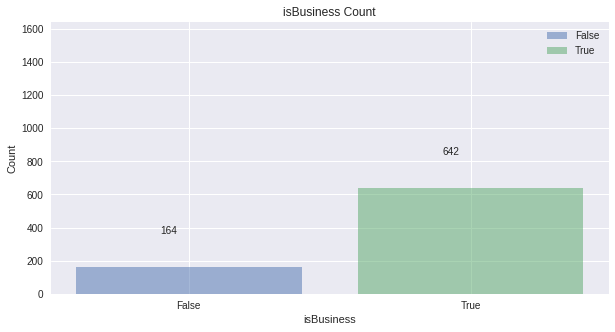

In [0]:
plot_cat_variables(df, ["isBusiness"], 10, 5)
# Dangerous to have replaced by most frequent value!

In [0]:
df["isBusiness"] = df["isBusiness"].fillna(False)

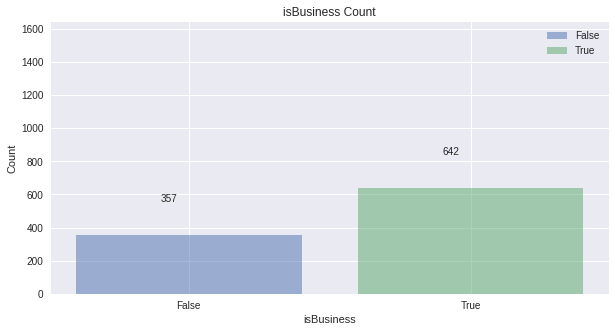

In [0]:
plot_cat_variables(df, ["isBusiness"], 10, 5)

## externalUrl

In [0]:
df["hasURL"] = -df["externalUrl"].isnull()

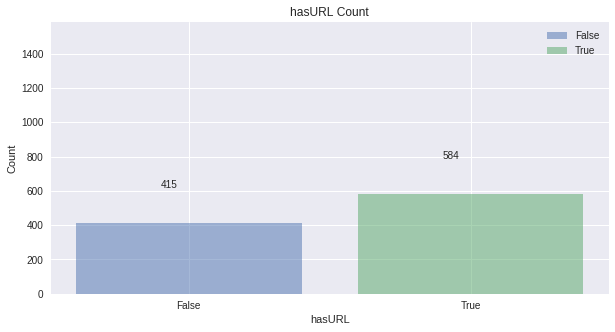

In [0]:
plot_cat_variables(df, ["hasURL"], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


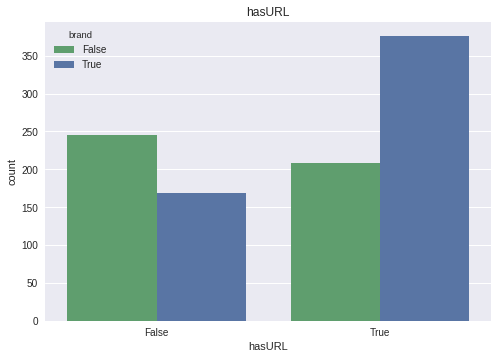

In [0]:
plot_cat_tar_relation(df, "hasURL", "brand", 10, 5)

## category

In [0]:
df['category'].nunique()

157

In [0]:
sum(df['category'].isnull())

357

In [0]:
df['category'].unique()

array([nan, 'Social Media Agency', 'Local Service', 'Product/Service',
       'Business', 'Coffee Shop', 'Radio Station', 'Personal Blog',
       'Public Figure', 'Entrepreneur', 'Arts & Entertainment',
       'Convention Center', 'Art', 'Brand', 'Producer',
       'Professional Service', 'Local Business', 'Medical Service',
       'Beauty, Cosmetic & Personal Care', 'Blogger', 'Music Award',
       'Wine/Spirits', 'Artist', 'Vegetarian/Vegan Restaurant',
       'Aerospace Company', 'Home Decor', 'Apparel Distributor',
       'Restaurant', 'Clothing (Brand)', 'Retail Company',
       'Food & Beverage Company', 'Health/Beauty', 'Shopping & Retail',
       'Fashion Model', 'Musician/Band', 'Government Official',
       'Cosmetics Store', 'Fitness Model', 'Design & Fashion',
       'Biotechnology Company', 'Hotel Resort', 'Vitamins/Supplements',
       'Video Creator', 'Food & Beverage', 'Magazine', 'Jewelry/Watches',
       'Cars', 'Makeup Artist', 'E-Cigarette Store',
       'Wedding Pl

There are just too many categories. Hot encoding would result in severe overfitting. Better to use another feature, hasCategories.

In [0]:
df["hasCategories"] = -df["category"].isnull()

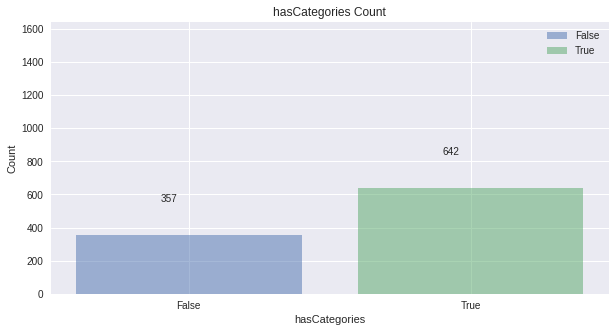

In [0]:
plot_cat_variables(df, ["hasCategories"], 10, 5)

This is exactly the same as isBusiness! Upon further research on my own instagram account, it is necessary to indicate category before I sign up. The initial intuition was right! After cleaning, let's us use plot car tar to visualise.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


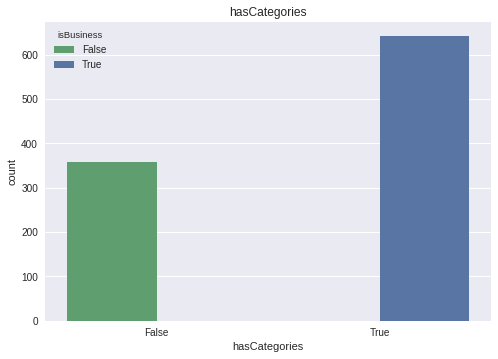

In [0]:
plot_cat_tar_relation(df, "hasCategories", "isBusiness", 10, 5)

In [0]:
sum((df["category"] == 'Fashion Model') | (df['category'] == 'Fitness Model'))
# So much for trying to use isModel!

4

## hasEmail

In [0]:
sum(df["hasEmail"].isnull())

0

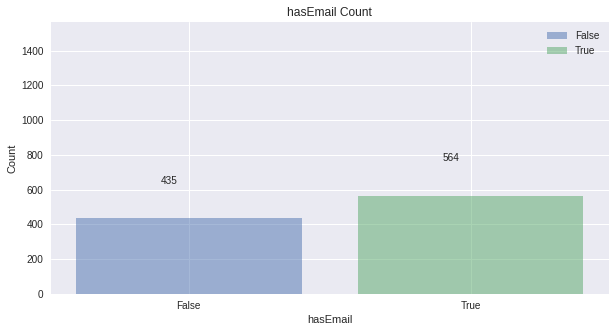

In [0]:
plot_cat_variables(df, ['hasEmail'], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


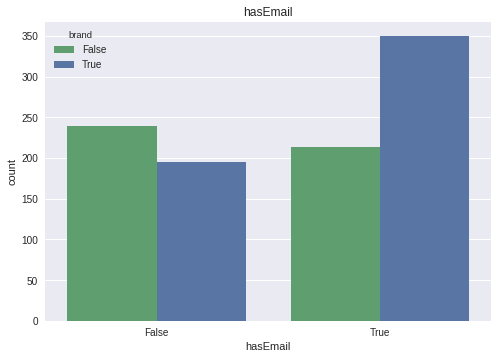

In [0]:
plot_cat_tar_relation(df, "hasEmail", "brand", 10, 5)

## picture

In [0]:
sum(df["picture"].isnull())

33

In [0]:
df["hasPicture"] = -df["picture"].isnull()

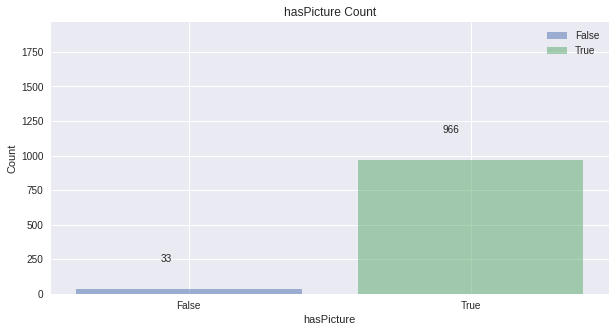

In [0]:
plot_cat_variables(df, ['hasPicture'], 10, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


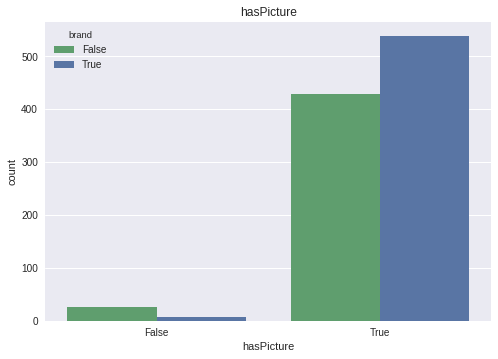

In [0]:
plot_cat_tar_relation(df, "hasPicture", "brand", 10, 5)

In [0]:
df[(df['hasPicture'] == False) & (df['brand'] == True)]

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail,Dummy,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone,hasURL,hasCategories,hasPicture
135,semconquer,True,Hairsalon BREEN Tokyo代表公表instagram★「切りたい」✂︎肩より...,482.0,0.000000e+00,0.00000,0.00000,NaN,8.190805e+11,871.0,5232.0,21.0,True,http://hair-breen.com/recruit2,Health/Beauty,0.0,0.0,NaN,"[(nan, nan, nan)]",True,,121.0,6.006889,False,True,False,True,True,True,False
352,licensurezoloft,True,Grosiran-eceran-reseller\r\r\ngudang tas\r\r\n...,8425.0,NaN,NaN,NaN,NaN,NaN,480.0,108510.0,282.0,False,NaN,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,160.0,226.062500,False,False,False,False,False,False,False
456,suddenlic,True,"💖Melengkapi Cantikmu💖\r\r\n""Glamorous, Stylish...",5722.0,0.000000e+00,0.00000,0.00000,NaN,6.285883e+12,4734.0,34512.0,31.0,True,http://www.jelgant.com/,Shopping & Retail,0.0,0.0,NaN,"[(nan, nan, nan)]",True,,142.0,7.290241,False,True,False,True,True,True,False
490,facya,True,🚚 JNE POS TIKI J&T\r\r\nWeekend close\r\r\n📞 W...,930.0,NaN,NaN,NaN,NaN,NaN,3366.0,158215.0,0.0,False,http://bit.ly/2nIDUTZ,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,89.0,47.003862,False,False,False,False,True,False,False
511,affinityreflects,True,Line: @yennyjewellery (pake @)\r\r\nBbm: D9167...,6825.0,NaN,NaN,NaN,NaN,NaN,4052.0,17002.0,0.0,False,http://shopee.co.id/labloomjewellery,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,152.0,4.195953,False,False,False,False,True,False,False
533,sexyunderline,True,"📱LINE : liangthing\r\r\n( Based in Sibolga,SAL...",1125.0,NaN,NaN,NaN,NaN,NaN,920.0,64269.0,866.0,False,NaN,NaN,0.0,0.0,NaN,"[(nan, nan, nan)]",False,,161.0,69.857609,False,False,False,False,False,False,False
939,fitmagic,True,Серф. Жизнь. Lifestyle.,345.0,1.081311e+14,59.92909,30.27981,190000,7.981970e+10,28.0,10651.0,26.0,True,http://v-dosku.ru/,Sports & Recreation,0.0,0.0,NaN,"[(nan, nan, nan)]",True,,23.0,380.392857,False,True,True,True,True,True,False


# Preprocessing

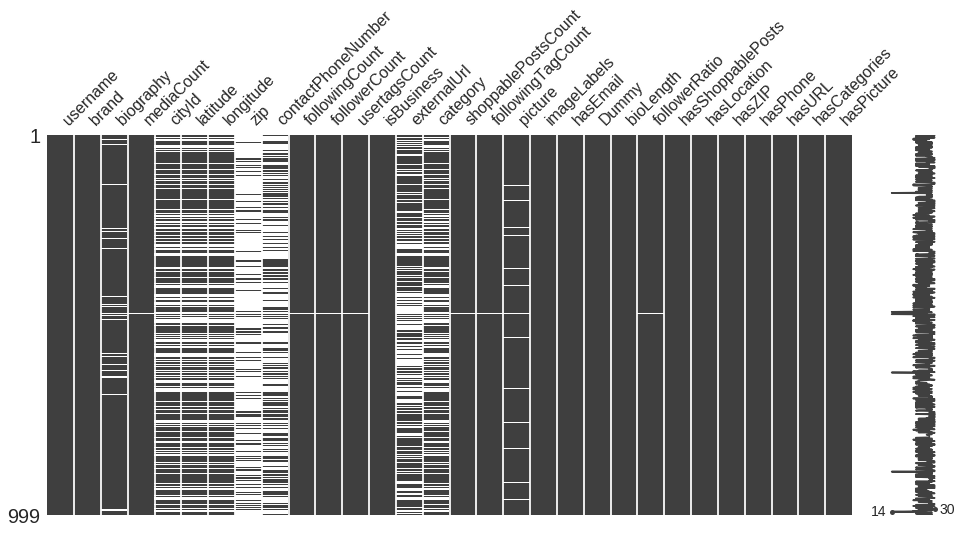

In [0]:
msno.matrix(df, figsize=(16,7))

In [0]:
# Drop the data that have a lot of null values.
df = df.dropna(thresh=20)

In [0]:
df.columns

Index(['username', 'brand', 'biography', 'mediaCount', 'cityId', 'latitude',
       'longitude', 'zip', 'contactPhoneNumber', 'followingCount',
       'followerCount', 'usertagsCount', 'isBusiness', 'externalUrl',
       'category', 'shoppablePostsCount', 'followingTagCount', 'picture',
       'imageLabels', 'hasEmail', 'Dummy', 'bioLength', 'followerRatio',
       'hasShoppablePosts', 'hasLocation', 'hasZIP', 'hasPhone', 'hasURL',
       'hasCategories', 'hasPicture'],
      dtype='object')

In [0]:
from copy import deepcopy
start_df = deepcopy(df)
final_df = start_df[['brand','mediaCount', 'followingCount', 'followerCount', 'usertagsCount', 'isBusiness', 
 'followingTagCount', 'hasEmail', 'bioLength', 'followerRatio', 'hasShoppablePosts', 
 'hasLocation', 'hasZIP', 'hasPhone', 'hasURL', 'hasPicture']]

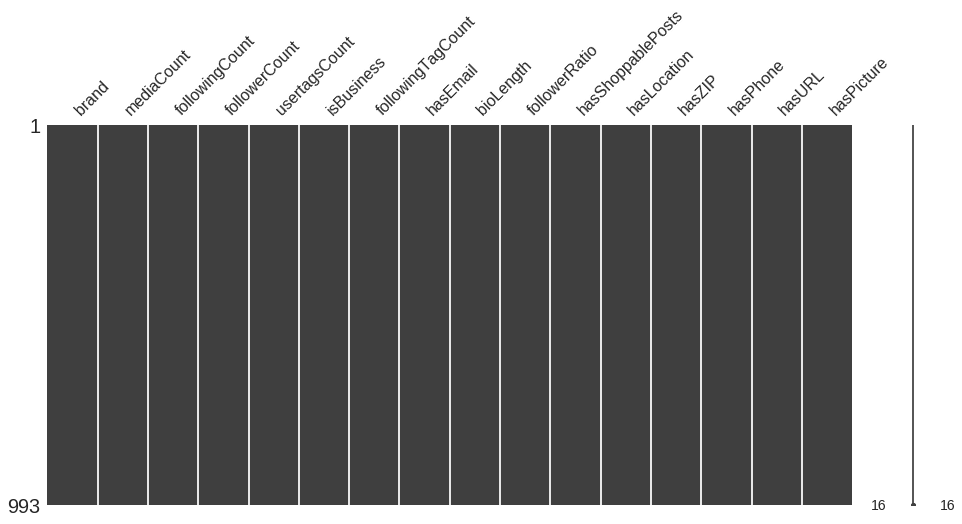

In [0]:
msno.matrix(final_df, figsize=(16,7))

In [0]:
binaryCols = ['brand','isBusiness', 'hasEmail', 'hasShoppablePosts', 'hasLocation', 'hasZIP', 'hasPhone', 'hasURL', 'hasPicture']

In [0]:
for i in binaryCols:
  print(df[i].nunique())

2
2
2
2
2
2
2
2
2


In [0]:
final_df.head(3)

,brand,mediaCount,followingCount,followerCount,usertagsCount,isBusiness,followingTagCount,hasEmail,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone,hasURL,hasPicture
0,True,16.0,17.0,265.0,3.0,False,0.0,False,72.0,15.588235,False,False,False,False,False,True
1,True,0.0,4.0,19.0,1.0,True,0.0,True,137.0,4.750000,False,True,False,False,False,True
2,True,22.0,381.0,407.0,7.0,True,0.0,True,120.0,1.068241,False,True,True,True,True,True


In [0]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
for col in binaryCols:
    final_df[col] = labelEncoder.fit_transform(final_df[col])

final_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,brand,mediaCount,followingCount,followerCount,usertagsCount,isBusiness,followingTagCount,hasEmail,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone,hasURL,hasPicture
0,1,16.0,17.0,265.0,3.0,0,0.0,0,72.0,15.588235,0,0,0,0,0,1
1,1,0.0,4.0,19.0,1.0,1,0.0,1,137.0,4.750000,0,1,0,0,0,1
2,1,22.0,381.0,407.0,7.0,1,0.0,1,120.0,1.068241,0,1,1,1,1,1
3,1,4216.0,5369.0,29575.0,349.0,1,2.0,1,129.0,5.508475,0,1,0,1,1,1
4,1,225.0,7448.0,2274.0,26.0,0,3.0,0,113.0,0.305317,0,0,0,0,0,1


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = deepcopy(final_df)
scaler = MinMaxScaler()
continuous = ['mediaCount', 'followingCount', 'followerCount', 'usertagsCount', 'followingTagCount', 'bioLength', 'followerRatio']
features_std = scaler.fit_transform(scaled_df[continuous])
features_df = pd.DataFrame(features_std,columns=continuous)

for column in features_df.columns:
    scaled_df[column] = features_df[column]

In [0]:
scaled_df.head(3)

,brand,mediaCount,followingCount,followerCount,usertagsCount,isBusiness,followingTagCount,hasEmail,bioLength,followerRatio,hasShoppablePosts,hasLocation,hasZIP,hasPhone,hasURL,hasPicture
0,1,0.000577,0.000062,1.897924e-06,2.980864e-07,0,0.0,0,0.426036,1.217228e-12,0,0,0,0,0,1
1,1,0.000000,0.000015,1.360775e-07,9.936212e-08,1,0.0,1,0.810651,3.709100e-13,0,1,0,0,0,1
2,1,0.000793,0.001386,2.914924e-06,6.955349e-07,1,0.0,1,0.710059,8.341505e-14,0,1,1,1,1,1


# Model Building

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import random
import xgboost as xgb

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
final_df.columns

Index(['brand', 'mediaCount', 'followingCount', 'followerCount',
       'usertagsCount', 'isBusiness', 'followingTagCount', 'hasEmail',
       'bioLength', 'followerRatio', 'hasShoppablePosts', 'hasLocation',
       'hasZIP', 'hasPhone', 'hasURL', 'hasPicture'],
      dtype='object')

In [0]:
features = ['mediaCount', 'followingCount', 'followerCount',
       'usertagsCount', 'isBusiness', 'followingTagCount', 'hasEmail',
       'bioLength', 'followerRatio', 'hasShoppablePosts', 'hasLocation',
       'hasZIP', 'hasPhone', 'hasURL', 'hasPicture']
X = final_df[features]
y = final_df[['brand']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

## Random Forest

In [0]:
kf = StratifiedKFold(n_splits=5, random_state=12345)

random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)

cv_model = cross_val_score(random_forest, # Cross-validation on Model 3
                             X_train, # Feature matrix
                             y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: roc
                            )

print("Random Forest model: %s" %(cv_model.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

Random Forest model: 0.8076736279747451


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion matrix, without normalization
[[68 25]
 [17 89]]
Accuracy:  0.7889447236180904
Area Under Curve Score : 0.7854027186041793
Sensitivity : 0.839622641509434


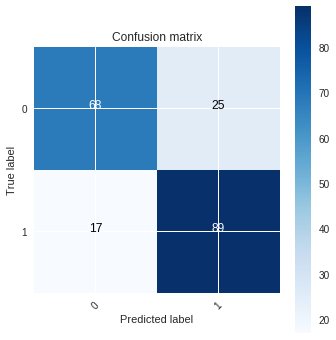

In [0]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model = RF.fit(X_train, y_train)
RF_model.classes_
# Validation
y_pred = RF_model.predict(X_test)

# Performance of decision tree model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))

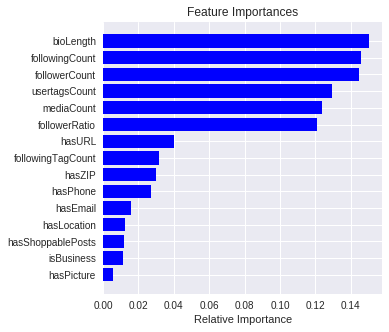

In [0]:
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using Random Grid Search to find the global optima (Vanila Grid Search may end up in local minima)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [0]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=10, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=5,
#             min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

### Validation Set on Optimised Random Forest

Confusion matrix, without normalization
[[68 25]
 [20 86]]
Accuracy:  0.7738693467336684
Area Under Curve Score : 0.7712517752079531
Sensitivity : 0.8113207547169812


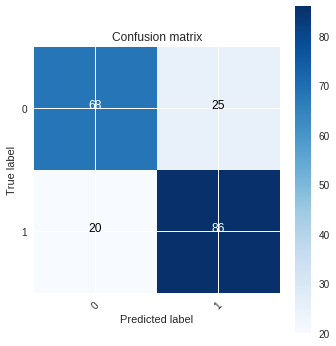

In [0]:
best_random = rf_random.best_estimator_
# Validation
y_pred = best_random.predict(X_test)

# Performance of decision tree model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))

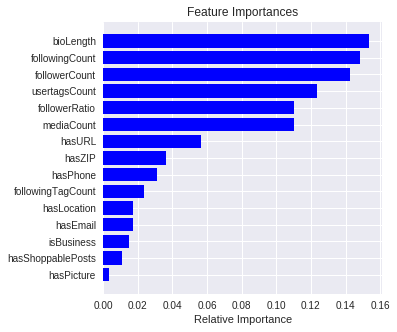

In [0]:
importances = best_random.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
import pickle

# Save to file in the current working directory
pkl_filename = "random_forest_1.0.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(best_random, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = pickle_model.predict(X_test) 

Test score: 77.39 %


## XGBoost
Just testing

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[55 38]
 [15 91]]
Accuracy:  0.7336683417085427
Area Under Curve Score : 0.7249442077500506
Sensitivity : 0.8584905660377359


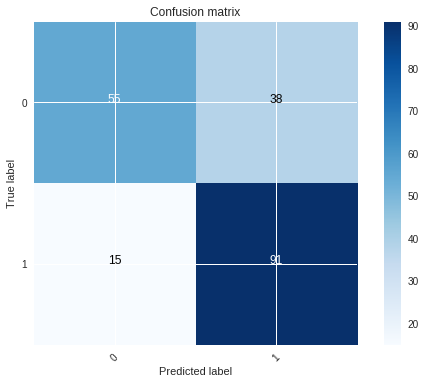

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))

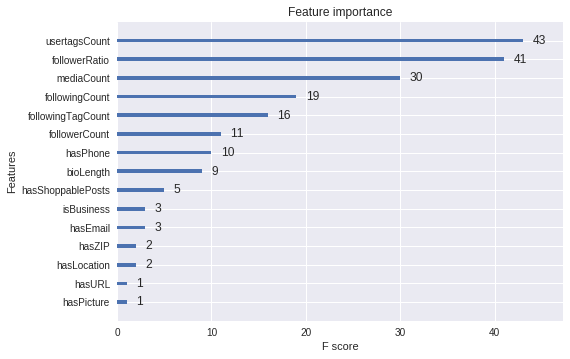

In [0]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Post analysis, there may be some data that we could obtain that may give us an increase in predictive power. They are:

1. Date created. MediaCount is dependent on how long an account has been up. With both of these variables, we can then find out the frequency of media posts which may prove to be a better predictor.
1. 
1. Grouped categories into subgroups! I tried creating a new field called "isModel" but it did not work as there were only 4 models.
1. isLogo for picture used

# Conclusion
The optimised Random Forest has done exceedingly well on the validation set (split train 80% and validation 20%), achieving outstanding results.

Accuracy:  0.774  
Area Under Curve Score : 0.771  
Sensitivity : 0.811 

Rigorous feature engineering was done to ensure that data would have been captured well by the models. A separate notebook containing all preprocessing and model building will be done so that it will be easier to test on your side.